In [1]:
! chmod 600 /content/kaggle.json

chmod: cannot access '/content/kaggle.json': No such file or directory


In [3]:
# import dataset
! KAGGLE_CONFIG_DIR=/content/ kaggle datasets download -d shiv28/animal-5-mammal

100% 889M/892M [00:28<00:00, 47.4MB/s]
100% 892M/892M [00:28<00:00, 33.3MB/s]


In [4]:
import zipfile,os

zip_file = zipfile.ZipFile('/content/animal-5-mammal.zip')
zip_file.extractall('/tmp/')

In [21]:
daftar_hewan=os.listdir('/tmp/Animal/train')
print(daftar_hewan)

['cat', 'ELEPHANT', 'LION', 'HORSE', 'dog']


In [22]:
from PIL import Image

total = 0

for i in daftar_hewan:
  dir = os.path.join('/tmp/Animal/train', i)
  y = len(os.listdir(dir))
  print(i+':', y)
  total = total + y
  
  img_name = os.listdir(dir)

  for j in range(4):
    img_path = os.path.join(dir, img_name[j])
    img = Image.open(img_path)
    print('-',img.size)
  print('======================')

print('\nTotal Dataset :', total)

cat: 2737
- (512, 512)
- (512, 512)
- (512, 512)
- (512, 512)
ELEPHANT: 2740
- (64, 64)
- (64, 64)
- (100, 100)
- (64, 64)
LION: 2684
- (226, 340)
- (300, 168)
- (226, 340)
- (64, 64)
HORSE: 2709
- (1024, 680)
- (278, 181)
- (1024, 768)
- (1024, 768)
dog: 2627
- (512, 512)
- (512, 512)
- (512, 512)
- (512, 512)

Total Dataset : 13497


In [30]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_data = ImageDataGenerator(
    rescale=1/255,
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=30,
    shear_range = 0.2,
    fill_mode='nearest',
    validation_split=0.2
)

val_data = ImageDataGenerator(
    rescale=1/255
)

In [31]:
train_generator = train_data.flow_from_directory(
    '/tmp/Animal/train',
    target_size=(150,150),
    class_mode='categorical',
    subset='training'
)

Found 10799 images belonging to 5 classes.


In [32]:
val_generator = train_data.flow_from_directory(
    '/tmp/Animal/train',
    target_size=(150,150),
    class_mode='categorical',
    subset='validation'
)

Found 2697 images belonging to 5 classes.


In [33]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, MaxPool2D, Dense

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [34]:
model.compile(
    loss='binary_crossentropy',
    optimizer=tf.optimizers.Adam(),
    metrics=['accuracy']
)

In [35]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.92 and logs.get('val_accuracy')>0.92):
      print("\nAkurasi telah mencapai > 92%!")
      self.model.stop_training = True
callbacks = myCallback()

In [40]:
history = model.fit(
    train_generator,
    epochs=200,
    steps_per_epoch=115,
    validation_data=val_generator,
    validation_steps=10,
    verbose=2,
    callbacks=[callbacks]
)

Epoch 1/200
115/115 - 32s - loss: 0.1332 - accuracy: 0.8571 - val_loss: 0.1367 - val_accuracy: 0.8562 - 32s/epoch - 281ms/step
Epoch 2/200
115/115 - 34s - loss: 0.1366 - accuracy: 0.8559 - val_loss: 0.1628 - val_accuracy: 0.8438 - 34s/epoch - 297ms/step
Epoch 3/200
115/115 - 33s - loss: 0.1306 - accuracy: 0.8590 - val_loss: 0.1467 - val_accuracy: 0.8562 - 33s/epoch - 284ms/step
Epoch 4/200
115/115 - 34s - loss: 0.1265 - accuracy: 0.8733 - val_loss: 0.1459 - val_accuracy: 0.8500 - 34s/epoch - 294ms/step
Epoch 5/200
115/115 - 32s - loss: 0.1324 - accuracy: 0.8591 - val_loss: 0.1143 - val_accuracy: 0.8875 - 32s/epoch - 276ms/step
Epoch 6/200
115/115 - 34s - loss: 0.1239 - accuracy: 0.8733 - val_loss: 0.1248 - val_accuracy: 0.8813 - 34s/epoch - 296ms/step
Epoch 7/200
115/115 - 32s - loss: 0.1205 - accuracy: 0.8752 - val_loss: 0.1757 - val_accuracy: 0.8125 - 32s/epoch - 275ms/step
Epoch 8/200
115/115 - 33s - loss: 0.1160 - accuracy: 0.8804 - val_loss: 0.1270 - val_accuracy: 0.8500 - 33s/epo

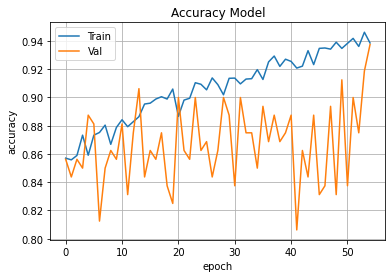

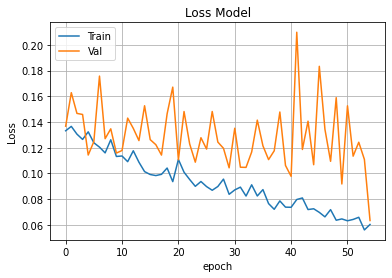

In [41]:
import matplotlib.pyplot as plt

# plot accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.grid(True)
plt.show()

# plot loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.grid(True)
plt.show()

In [42]:
# konversi model
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# simpan model
with tf.io.gfile.GFile('klasifikasi_gambar_model.tflite', 'wb') as f:
  f.write(tflite_model)